# Decision Trees Exercise
In this exercise you will show that ID3 is sub-optimal. Implement a simple version of Decision Tree, and will then apply a Decision Tree classsifier on the MNIST hand written digits dataset that we already saw.

## Suboptimality of ID3
Consider the following training set, where $\mathcal{X} = \{0, 1\}^3$ and $\mathcal{Y} =\{0, 1\}$:

$$
\begin{aligned}
((1, 1, 1), 1)\\
((1, 0, 0), 1)\\
((1, 1, 0), 0)\\
((0, 0, 1), 0)
\end{aligned}
$$

Suppose we wish to use this training set in order to build a decision tree of depth 2 (i.e. for each
input we are allowed to ask two questions of the form "$x_i = 0$?" before deciding on the label).

1. Suppose we run the ID3 algorithm up to depth 2 (namely, we pick the root node and its
children according to the algorithm, but instead of keeping on with the recursion, we stop
and pick leaves according to the majority label in each subtree, once we reach depth 2). 
Assume that the subroutine used to measure the quality of each feature is based on the information gain, and that if two features get the same score, one of them is picked arbitrarily. 
Show that the training error of the resulting decision tree is at least 1/4.
2. Find a decision tree of depth 2, which attains zero training error.


#### Answer
The **entropy** of a given node with a sample set $S$ is defined as 

$$
\Pr(y|S)=p \quad\Longrightarrow\quad H(S)=-p\log p-(1-p)\log (1-p)
$$


The **information gain** is defined as the weighted reduction in entropy.

Assume that the set at the current node we wish to split is denoted $S_\text{parent}$, its subset of samples with property $i$ being 1 is denoted $S_{x_i}$, and its subset of samples with property $i$ being 0 is denoted $S_{\lnot x_i}$.

So, the gain of splitting based on property $i$, it is defined as follows

$$
\text{Gain}(S_\text{parent}, i) = H(S_\text{parent}) - \left(\Pr(x_i|S_\text{parent})H(S_{x_i}) + \Pr(\lnot x_i|S_\text{parent})H(S_{\lnot x_i})\right)
$$

But the first term is constant for all attributes $i$, so we just need to choose the attribute $i$ which minimizes the weighted entropy of the sub-sets. Let's mark this as $H_\mathrm{w}(S,i)$, so 

$$
\text{Gain}(S_\text{parent}, i) = H(S_\text{parent}) - H_\mathrm{w}(S_\text{parent},i)
$$

and we want to find in each split 
$$i = \arg\min_i H_\mathrm{w}(S_\text{parent},i)$$

Last, we note that if the subset is completly pure (all labels of the subset are the same), the entropy is defined as zero.

---
1.   Root split:

  We have that
  $$
  H_\mathrm{w}(S_\text{root},1) = \tfrac{3}{4}(-\tfrac{2}{3}\log \tfrac{2}{3} - \tfrac{1}{3}\log \tfrac{1}{3}) + \tfrac{1}{4}(0) \approx 0.688\\
  H_\mathrm{w}(S_\text{root},2) = H_\mathrm{w}(S_\text{root},3) = \tfrac{1}{2}(-\tfrac{1}{2}\log \tfrac{1}{2} - \tfrac{1}{2}\log \tfrac{1}{2}) + \tfrac{1}{2}(-\tfrac{1}{2}\log \tfrac{1}{2} - \tfrac{1}{2}\log \tfrac{1}{2})=1
  $$

  and since $H_\mathrm{w}(S_\text{root},1) < H_\mathrm{w}(S_\text{root},2) = H_\mathrm{w}(S_\text{root},3)$ we choose to first split on attribute 1.


2.   Now, we have two sets: $S_{\lnot x_1}$ which contains only one sample (so we will not split it anymore (it is pure by definition) - if you reach that leaf you will get the label 0. The other set is $S_{x_1}$ which contains all the samples with first coordinate set to 1. Let's check how we will split this node.

  $$
  H_\mathrm{w}(S_{x_1},2) = \tfrac{2}{3}(-\tfrac{1}{2}\log \tfrac{1}{2} - \tfrac{1}{2}\log \tfrac{1}{2}) + \tfrac{1}{3}(0) = \tfrac{2}{3}\\
  H_\mathrm{w}(S_{x_1},3) = \tfrac{1}{3}(0) + \tfrac{2}{3}(-\tfrac{1}{2}\log \tfrac{1}{2} - \tfrac{1}{2}\log \tfrac{1}{2}) = \tfrac{2}{3}
  $$
  
  This is the same, so we can randomly choose to split on attribute 2 (one of the nodes will have one sample, and hence also one label, while the other node will have two samples with different labels).

3. There are no more splits since we got to depth 2 as requiered.

---
Now, let's test what is the training error of the tree we created. The train error is simply the number of samples in terminal nodes which have a label other than the majority vote in this leaf. In our case, we have 3 terminal nodes, two of which hold one sample (hence are pure and have no training error), and one terminal node which has two samples in it: 

$$
\begin{aligned}
((1, 1, 1), 1)\\\
((1, 1, 0), 0)
\end{aligned}
$$

In this case, the label for this terminal node is picked arbitrarily to be either 0 or 1, but whatever we choose, we will be left with one example on which we make an error. So the overall train error rate for this tree is $1/4$ (as was required to show).

---
Last, let's describe a tree of depth 2 which has zero train error rate:

  *"First, split on attribute 2, then, in each sub-node, split on attribute 3. Ignore attribute 1 completely."*

Verify that indeed this tree has zero train error rate.

In [1]:
import numpy as np
hw1 = 3/4 * (-2/3 * np.log2(2/3) - 1/3 * np.log2(1/3)) + 1/4*0
hw2 = 1/2 * (-1/2 * np.log2(1/2) - 1/2 * np.log2(1/2)) * 2
hw3 = 2/3 * (-1/2 * np.log2(1/2) - 1/2 * np.log2(1/2)) + 1/3*0
print(hw1, hw2, hw3)

0.6887218755408672 1.0 0.6666666666666666


## Implementing Decision Tree From Scratch
In this exercise you will need to implement a simple version of Random Forest from scratch. Your decision tree will handle **continuous input and output** (this should actually work also for binary input attributes). 

* Compelete the skeleton class below (hint: you should also create a `DecisionTree` class that the `TreeEnsemble` will use)
  - `X` is a matrix of data values (rows are samples, columns are attributes)
  - `y` is a vector of corresponding target values
  - `min_leaf` is the minimal number of samples in each leaf node of each tree in the forest
  
* For splitting criterion, use either **"Train Squared Error Minimization (Reduction in Variance)"** or **"Train Absolute Error Minimization"** (choose one). Whatever you choose, make sure you implement the splitting point decision efficiently (in $O(n\log n)$ time, where $n$ is the number of samples in the current node).

* The `predict` function will use mean of the target values in the leaf node matching each row of the given `X`. The result is a vector of predictions matching the number of rows in `X`.

* To check your random forest implementation, use the bostom dataset (`from sklearn.datasets import load_boston`)

  - Use the following to estimate what are the best hyper parameters to use for your model
```
    for min_leaf in [1,5]:
      forest = TreeEnsemble(X, y, n, sz, min_leaf)
      mse = forest.oob_mse()
      print("n_trees:{0}, sz:{1}, min_leaf:{2} --- oob mse: {3}".format(n, sz, min_leaf, mse))
```
  
  - Using your chosen hyperparameters as a final model, plot the predictions vs. true values of all the samples in the training set . Use something like:
  ```
  y_hat = forest.predict(X)  # forest is the chosen model
  plt.scatter(y_hat, y)
  ```
  



#### Answer

In [166]:
class DecisionTree():
  def __init__(self, X, y, attribute_names, min_leaf=5, reset_node_id=False):
    self.X, self.y, self.attribute_names, self.min_leaf = \
      X, y, attribute_names, min_leaf
    self.n, self.c = X.shape
    assert self.c == len(attribute_names)
    self.value = np.mean(y)
    self.score = float('inf')
    self._find_varsplit()
    
  def _find_varsplit(self):
    for j in range(self.c): 
      self._find_better_split(j)
    if self.score == float('inf'): 
      return
    Xj = self.split_col
    lhs = np.nonzero(Xj <= self.split_value)[0]
    rhs = np.nonzero(Xj > self.split_value)[0]
    self.lhs = DecisionTree(self.X[lhs], self.y[lhs], self.attribute_names)
    self.rhs = DecisionTree(self.X[rhs], self.y[rhs], self.attribute_names)

  def _find_better_split(self, attribute_idx):
    # x is the j'th column (j = attribute_idx)
    x, y = self.X[:, attribute_idx], self.y
    sort_idx = np.argsort(x)
    sort_y, sort_x = y[sort_idx], x[sort_idx]
    rhs_cnt, rhs_sum, rhs_sum2 = self.n, sort_y.sum(), (sort_y**2).sum()
    lhs_cnt, lhs_sum, lhs_sum2 = 0, 0., 0.

    for i in range(0, self.n - self.min_leaf - 1):
      # set the i'th sample, in the j'th arrtibute
      xi, yi = sort_x[i], sort_y[i]  
      # apply incremental updates to save score computation time
      lhs_cnt += 1; rhs_cnt -= 1
      lhs_sum += yi; rhs_sum -= yi
      lhs_sum2 += yi**2; rhs_sum2 -= yi**2
      # calculate current split point i if needed
      if i < self.min_leaf or xi == sort_x[i+1]:
          continue
      lhs_std = std_agg(lhs_cnt, lhs_sum, lhs_sum2)
      rhs_std = std_agg(rhs_cnt, rhs_sum, rhs_sum2)
      curr_score = lhs_std*lhs_cnt + rhs_std*rhs_cnt
      if curr_score < self.score: 
        self.attribute_idx, self.score, self.split_value = attribute_idx, curr_score, xi

  def _predict_row(self, xi):
    if self.is_leaf:
      return self.value
    t = self.lhs if xi[self.attribute_idx] <= self.split_value else self.rhs
    return t._predict_row(xi)
  
  def predict(self, X):
    return np.array([self._predict_row(xi) for xi in X])
  
  @property
  def split_name(self): return self.attribute_names[self.attribute_idx]

  @property
  def split_col(self): return self.X[:, self.attribute_idx]

  @property  # TODO: could return a heatmap color based on self.value
  def color(self): return '#e58139ff' if self.is_leaf else '#eff13955'
  
  @property
  def is_leaf(self): return self.score == float('inf')

  def __str__(self):
    """ Representation of the root node of this tree """
    if self.is_leaf:
      s = 'LEAF'
    else:
      s = f'{self.split_name} <= {self.split_value:.2f}\\nscore = {self.score:.2f}'
    s += f'\\nsamples = {self.n}\\nvalue = {self.value:.2f}'
    return s

In [167]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
boston = load_boston()
# X = pd.DataFrame(data=boston.data, columns=boston.feature_names)
X = boston.data
y = boston.target
attribute_names = boston.feature_names
print("Loaded Boston:", X.shape[0],"samples with",X.shape[1],"attributes")
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=444)

Loaded Boston: 506 samples with 13 attributes


In [168]:
# Applying manual grid search to find optimal params using mse
# (could also use sklearn.model_selection.GridSearchCV)
for min_leaf in [1,5,10,100]:
      dt = DecisionTree(X_train, y_train, attribute_names, min_leaf)
      mse = sum((dt.predict(X_test) - y_test) ** 2) / len(X_test)
      print("min_leaf:{0} --- mse: {1}".format(min_leaf, mse))

min_leaf:1 --- mse: 25.152522295037045
min_leaf:5 --- mse: 25.152522295037045
min_leaf:10 --- mse: 25.152522295037045
min_leaf:100 --- mse: 17.644934876310987


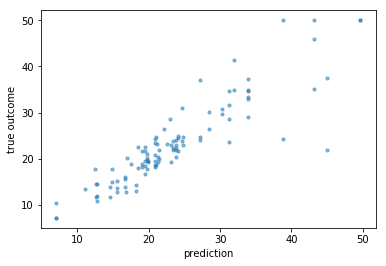

In [169]:
# Plotting the performance of the chosen model
dt = DecisionTree(X_train, y_train, attribute_names, min_leaf=100)
y_hat = dt.predict(X_test)
plt.figure()
plt.scatter(y_hat, y_test, alpha=0.5, s=10)
plt.xlabel('prediction')
plt.ylabel('true outcome');

## Using Decision Tree 
Remeber the MNIST dataset used - you will now test the power of decision trees on this problem.
This time you are given a free hand in choosing the test and train set sizes, model parameters (such as gain function and constraints over the trees) and features (whether to use binary pixel values or the original continous gray value).
- Choose which model parameters you wish to optimize, explain how would you do that, and find a model which you believe would have the minimal generalization error --- do this for both a single decision tree model, and a random forest.
  - You can use `sklearn.tree.DecisionTreeClassifier`
- Once you are satisfied with the model parameters, plot for each of the models (a single decision tree and random forest) the importance of each of the pixels to the final decision.
- Last, estimate the class assignment probabilities for all the correctly classified and misclassified examples in your test data.
- Discuss your results.

## Answer
The way to optimize the hyper-parameters is to use a validation set. For this, we can use for example the score of our model on a 5-fold cross-validation test perfromed on our train data. Below are the results.
Due to a relatively long running time, we use only 2000 sample. Using a grid search over a few hyperparameters values and reviewin their 5-fold CV scores, we see the difference between the models is very low. However, based on the maximal score, we chose to use the 'entropy' criterion, with max depth of 32, and 200 as the max number of features (a better test would be to run the CV several times and on much bigger sample set). Once we trained the model over the entire train data set, this resulted in a totoal accuracy of ~0.87 (not too bad, but not too good either).

For the Random Forest we decided only to try and optimize the number of trees in the forest and the criterion, and to use the default values for all other hyperparameters. Looking at the 5-fold CV scores, we decided to use the 'gini' criterion with 200 trees in the forest (where running time was also a consideration). We then train the model over the entire train data set, which resulted in a very good total accuracy of ~0.97. This shows how powerful predictors random forests are.

When plotting the pixels importance we can see that both algorithms found the center much more important than the pixels near the edges, and we can see a few specific areas which were much more critical to reach the final predicition (specifically, a "line" going from the center towards the bottom left corner, and two spots to the left and above this line).
However, the random forest model found many more important pixels - this is probably since those features are important to reach the final prediction once we need to get the correct classification also for the "hard" cases.

Reminder: "The predicted class probabilities of an input sample are computed as the mean predicted class probabilities of the trees in the forest, where the class probability of a single tree is the fraction of samples of the same class in a leaf." (see [`RandomForestClassifier.predict_proba`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict_proba)).
So, using the estimated class probability, for both the error classifications and the correct classifications, we see that the classifier clearly has low confidence in the results which turned out to be error predictions. The probablity of a class assignment which turned out to be a missclassification was 0.41 (+/- 0.07), compared with the probability of a correct class assignment, which was 0.84 (+/- 0.09).

### Loading the data
Same as we did in previous exercise...

In [111]:
from sklearn.datasets import load_digits
# Optinally, set data_home to where you want to download your data
mnist = load_digits()

In [112]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def show_digit_image(digit_data, digit_label=None, title=""):
  plt.imshow(np.reshape(digit_data, (8,8)), cmap=plt.cm.gray)
  plt.title(title, fontsize = 12)
  plt.axis('off')
  plt.grid(False)

def calc_confusion_matrix(true_lables, predicted_labels, normalize=False, show_plot=True, title=""):
  cm = confusion_matrix(true_lables, predicted_labels)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

  if show_plot:
    num_labels = np.unique([true_lables, predicted_labels]).size
    plt.figure(figsize=(num_labels, num_labels))
    sns.heatmap(cm, annot=True, fmt=".3f" if normalize else "d", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    plt.title(title, size = 15)
   
  return cm

Image Data Shape(1797, 64)
Label Data Shape(1797,)


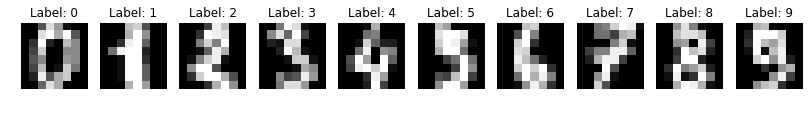

In [113]:
# Print to image data and labels data shapes
print("Image Data Shape" + str(mnist.data.shape))
print("Label Data Shape" + str(mnist.target.shape))

# Print a sample of each digits
plt.figure(figsize=(14,2))
for digit in range(10):
  first_item_index = np.argwhere(mnist.target==digit)[0]
  (image, label) = (mnist.data[first_item_index], mnist.target[first_item_index])
  plt.subplot(1, 10, digit + 1)
  show_digit_image(image, label, title='Label: %i' % digit)

In [114]:
# Split the data into training and test sets (we set random_state so that we fix
# the splitting, so not every time we run this notebook a different split would be made)
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data, mnist.target, test_size=1/7.0, random_state=0)

### Decision Tree

In [115]:
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import cross_val_score
#import StringIO, pydot

num_sample = 2000

for criterion in ['gini', 'entropy']:
  for max_depth in [8, 16, 24, 32]:
    for max_features in [10, 20, 40, 64]:
      clf = tree.DecisionTreeClassifier(criterion="gini", max_depth=32, max_features=63)
      clf = clf.fit(train_img[:num_sample], train_lbl[:num_sample])
      scores = cross_val_score(clf, train_img[:num_sample], train_lbl[:num_sample].tolist(), cv=5)
      print('cv5 score mean = ' + str(scores.mean()) + ' for criterion ' + criterion + ' max_depth=' + str(max_depth)+ ' max_features=' + str(max_features))
      #print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() / 2)) # Cross Validation Results for Decision Tree

cv5 score mean = 0.8564563391419974 for criterion gini max_depth=8 max_features=10
cv5 score mean = 0.843994786258173 for criterion gini max_depth=8 max_features=20
cv5 score mean = 0.8537427427664163 for criterion gini max_depth=8 max_features=40
cv5 score mean = 0.8452586293347872 for criterion gini max_depth=8 max_features=64
cv5 score mean = 0.8544636104925687 for criterion gini max_depth=16 max_features=10
cv5 score mean = 0.8563176951154267 for criterion gini max_depth=16 max_features=20
cv5 score mean = 0.8602443581739587 for criterion gini max_depth=16 max_features=40
cv5 score mean = 0.8388542852603663 for criterion gini max_depth=16 max_features=64
cv5 score mean = 0.8564396577690694 for criterion gini max_depth=24 max_features=10
cv5 score mean = 0.8472216937551285 for criterion gini max_depth=24 max_features=20
cv5 score mean = 0.8531108464294883 for criterion gini max_depth=24 max_features=40
cv5 score mean = 0.8441072735425628 for criterion gini max_depth=24 max_features=

              precision    recall  f1-score   support

           0     0.8000    0.9412    0.8649        17
           1     0.7097    0.8462    0.7719        26
           2     0.9545    0.8400    0.8936        25
           3     0.7143    0.9091    0.8000        22
           4     0.8000    1.0000    0.8889        16
           5     0.8519    0.7931    0.8214        29
           6     0.9143    0.9697    0.9412        33
           7     0.7667    0.7419    0.7541        31
           8     0.9286    0.4815    0.6341        27
           9     0.8000    0.7742    0.7869        31

   micro avg     0.8171    0.8171    0.8171       257
   macro avg     0.8240    0.8297    0.8157       257
weighted avg     0.8286    0.8171    0.8121       257

Totoal accuracy: 0.8171206225680934


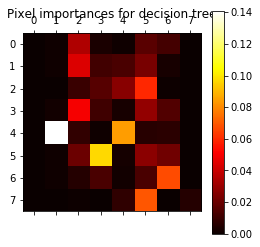

In [116]:
# final decision tree model
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=32, max_features=64)
clf = clf.fit(train_img, train_lbl)
predictions = clf.predict(test_img)
print(metrics.classification_report(test_lbl.tolist(), predictions, digits=4))
print('Totoal accuracy: ' + str(clf.score(test_img, test_lbl)))

# Pixel importances on 8*8 image
importances = clf.feature_importances_
importances = importances.reshape((8, 8))

# Plot pixel importances
plt.matshow(importances, cmap=plt.cm.hot)
plt.colorbar()
plt.title("Pixel importances for decision tree")
plt.show()
